<h1>Projeto de Exploração de Dados do INMET</h1><hr>

### O que é o INMET

<p>
O Instituto Nacional de Meteorologia do Brasil (INMET) é um órgão federal do Ministério da Agricultura, Pecuária e Abastecimento (MAPA), criado em 1909 com a missão de prover informações meteorológicas através de monitoramento, análise e previsão do tempo e clima. O instituto também é responsável por pesquisas para prover informações adequadas em situações diversas, como no caso de desastres naturais como inundações e secas extremas que afetam, limitam ou interferem nas atividades cotidianas da sociedade brasileira.
</p>

<center><img src='satelite_inmet.png'/></center>
### Sobre os dados

Fonte: [Site do INMET](https://bdmep.inmet.gov.br/) 

### Organização dos dados
* Data da medição: YYYY/MM/DD
* Hora UTC
* Precipitação Total no Horário do Registro em Mm
* Pressao Atmosferica Ao Nivel Da Estacao (Mb)
* Pressão Atmosferica Máxima Na Hora Anterior (Aut) (Mb)
* Pressão Atmosferica Mínima Na Hora Anterior (Aut) (Mb)
* Radiacao Global (Kj/M²)
* Temperatura Do Ar Por Termômetro Comum (Bulbo Seco) em °C
* Temperatura Do Ponto De Orvalho (°C)
* Temperatura Máxima Na Hora Anterior (Aut) (°C)
* Temperatura Mínima Na Hora Anterior (Aut) (°C)
* Temperatura Orvalho Máxima Na Hora Anterior (Aut) (°C)
* Temperatura Orvalho Mínima Na Hora Anterior (Aut) (°C)
* Umidade Relativa Máxima Na Hora Anterior (Aut) (%)
* Umidade Relativa Mínima Na Hora Anterior (Aut) (%)
* Umidade Relativa Do Ar No Momento Da Medição (%)
* Vento, Direção Horária (Gr)
* Vento, Rajada Maxima (M/S)
* Vento, Velocidade Horária (M/S)

<p>
<b>Sobre a Medição de Temperatura do Ponto do Orvalho</b>

O ponto de orvalho é definido como a temperatura até a qual o ar (ou gás) deve ser resfriado para que a condensação de água se inicie, ou seja, para que o ar fique saturado de vapor de água. Na temperatura do ponto de orvalho a quantidade de vapor de água presente no ar é máxima.

A capacidade de retenção de água pelo ar é fortemente dependente da temperatura: ar quente pode reter mais água. A temperatura de ponto de orvalho pode ser calculada a partir da umidade relativa e da temperatura do ar.

<b>Efeito da temperatura do ar</b>

A temperatura de ponto de orvalho está relacionada à quantidade de vapor de água presente no ar e é, portanto, independente da temperatura (o mesmo não acontece com a umidade relativa, que reduz com o aumento da temperatura).

<b>Efeito da pressão</b>

A temperatura de ponto de orvalho é sensível à pressão, pois esta afeta a pressão parcial de vapor de água do ar. Ao se elevar a pressão do ar (mantendo constante a temperatura), a temperatura de ponto de orvalho se eleva, e caso ultrapasse a temperatura do ar, ocorrerá condensação.

<b>Aplicação</b>

O ponto de orvalho é tipicamente utilizado para representar a quantidade de vapor de água em ar ou gás seco. Em baixa umidade, as mudanças na temperatura de orvalho são maiores que as de umidade relativa, permitindo maior precisão de medida e controle. Por exemplo, à temperatura ambiente, uma variação no ponto de orvalho de -35°C para -3 °C corresponde a uma variação de apenas 1% para 1,5% na umidade relativa.
</p>

Fonte:[Novus](https://www.novus.com.br/site/default.asp?Idioma=55&TroncoID=053663&SecaoID=0&SubsecaoID=0&Template=../artigosnoticias/user_exibir.asp&ID=625480)

<b> OBS</b>

A partir do nome dos arquivos de cada estação meteorológica, os dados de sua localização foram adicionados à base que compõe o dataframe geral. Essa adição ocorre no momento da leitura dos dados
</p>

In [1]:
#para uso de expressoes na manipulacao dos arquivos durante o loading
import glob

#basico para manipulacao dos dados via dataframe
import pandas as pd

#para manipulacao de vetores
import numpy as np

#bibliotecas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#aqui começa a saga para fazer o load dos dados...

#alterei o nome das colunas para melhor codificacao ao longo no notebook ;-)
colunas = ['data', 'horario', 'precipitacao', 'horario', 'pressao_atm', 'pressao_max', 'pressao_min', 'radiacao', 'temp_bulbo', 'temp_orvalho', 'temp_max', 'temp_min', 'temp_orvalho_max', 'temp_orvalho_min', 'umidade_max', 'umidade_min', 'umidade_ar', 'vento_dir', 'vento_rajada', 'vento_vel', 'regiao','uf','codigo','estacao']

#denomincao original presente nos arquivos CSV
#Data;Hora UTC;PRECIPITAÇÃO TOTAL, HORÁRIO (mm);PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB);PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB);PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB);RADIACAO GLOBAL (Kj/m²);TEMPERATURA DO AR - BULBO SECO, HORARIA (°C);TEMPERATURA DO PONTO DE ORVALHO (°C);TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C);TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C);TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C);TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C);UMIDADE REL. MAX. NA HORA ANT. (AUT) (%);UMIDADE REL. MIN. NA HORA ANT. (AUT) (%);UMIDADE RELATIVA DO AR, HORARIA (%);VENTO, DIREÇÃO HORARIA (gr) (° (gr));VENTO, RAJADA MAXIMA (m/s);VENTO, VELOCIDADE HORARIA (m/s);

In [3]:
#Rotulação em PT para a legenda dos gráficos dos meses
month_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

In [4]:
#caminho de onde estao os arquivos CSV localmente
path = '../data/'

#para um processamento mais leve, montei uma pasta com um subset dos CSVs, que pode ser usada a titulo de demonstracao
#path = '../datatmp/'

In [5]:
#string para carregar todos os arquivos
all_files = glob.glob(path + '*.CSV')

In [6]:
#listagem dos arquivos a serem carregados
for fname in all_files:
    print(fname)

INMET_CO_MS_S716_SANTA RITA DO PARDO_01-01-2020_A_31-12-2020.CSV
../data/INMET_S_RS_A879_CANELA_01-01-2020_A_31-12-2020.CSV
../data/INMET_CO_GO_A031_SAO MIGUEL DO ARAGUAIA_01-01-2020_A_31-12-2020.CSV
../data/INMET_NE_BA_A429_BARRA_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_MG_A553_JOAO PINHEIRO_01-01-2020_A_31-12-2020.CSV
../data/INMET_S_RS_A893_ENCRUZILHADA DO SUL_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_MG_A517_MURIAE_01-01-2020_A_31-12-2020.CSV
../data/INMET_CO_MT_A932_GUIRATINGA_01-01-2020_A_31-12-2020.CSV
../data/INMET_N_PA_A250_SANTAREM_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_SP_A748_BARRETOS_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_RJ_A630_SANTA MARIA MADALENA_01-01-2020_A_31-12-2020.CSV
../data/INMET_S_RS_A889_SAO VICENTE DO SUL_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_MG_A511_TIMOTEO_01-01-2020_A_31-12-2020.CSV
../data/INMET_S_RS_A878_MOSTARDAS_01-01-2020_A_31-12-2020.CSV
../data/INMET_N_AC_A138_FEIJO_01-01-2020_A_31-12-2020.CSV
../data/INMET_SE_SP_A765_BERT

In [7]:
#carregamento efetivo dos arquivos CSV para do dataframe principal (df)
df = pd.DataFrame()

#leitura de arquivo por arquivo
for fname in all_files:

    #quebra das informacoes extraidas a partir do nome do arquivo CSV
    wheather_station_sets = fname.split('_')

    #a leitura desses arquivos foi uma saga!!! :-P
    #leitura desconsiderando as 8 primeiras linhas, configuracao dos caracteres por conta dos especiais do PT, delimitacao dos dados (;) e tratamento dos valores decimais que em PT usa-se (,)
    file_df = pd.read_csv(fname, skiprows=8, encoding='latin-1', delimiter=';', decimal=',')

    #adicao de colunas extras para discriminar os principais dados da estacao metereologica - dados obtidos pelo nome do arquivo CSV
    file_df['regiao'] = wheather_station_sets[1]
    file_df['uf'] = wheather_station_sets[2]
    file_df['codigo'] = wheather_station_sets[3]
    file_df['cidade'] = wheather_station_sets[4]

    #adicao do dataframe da estacao (temporario) ao dataframe geral
    df = df.append(file_df, ignore_index=True)

    #OBS: a leitura dos dados ficou demasiadamente lenta, há opções de otimização mas em virtude da escassez do tempo...

In [8]:
df.shape

(5173776, 24)

In [9]:
df.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m²)                                  float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, H

In [10]:
#alteracao do nome das colunas para algo menor e mais pratico
df.columns = colunas

In [11]:
#tratamento do formato da data
df['data'] = pd.to_datetime(df.data, format='%Y/%m/%d')

### Visão geral sobre os dados

In [12]:
df.head()

,data,horario,precipitacao,horario,pressao_atm,pressao_max,pressao_min,radiacao,temp_bulbo,temp_orvalho,...,umidade_max,umidade_min,umidade_ar,vento_dir,vento_rajada,vento_vel,regiao,uf,codigo,estacao
0,2020-01-01,0000 UTC,0.0,975.1,975.1,974.2,NaN,25.2,22.0,25.8,...,78.0,83.0,335.0,2.3,0.7,NaN,CO,MT,A936,SALTO DO CEU
1,2020-01-01,0100 UTC,0.0,976.3,976.3,975.0,NaN,24.9,22.2,25.2,...,83.0,85.0,321.0,2.3,1.2,NaN,CO,MT,A936,SALTO DO CEU
2,2020-01-01,0200 UTC,0.0,976.5,976.5,976.3,NaN,25.1,22.5,25.2,...,85.0,86.0,310.0,2.9,1.0,NaN,CO,MT,A936,SALTO DO CEU
3,2020-01-01,0300 UTC,0.0,976.3,976.5,976.3,NaN,24.6,22.2,25.1,...,86.0,86.0,305.0,2.3,1.1,NaN,CO,MT,A936,SALTO DO CEU
4,2020-01-01,0400 UTC,0.0,976.3,976.5,976.3,NaN,24.5,22.1,24.7,...,86.0,87.0,333.0,3.0,0.4,NaN,CO,MT,A936,SALTO DO CEU


In [19]:
df.regiao.unique()

array(['CO', 'SE', 'N', 'NE', 'S'], dtype=object)

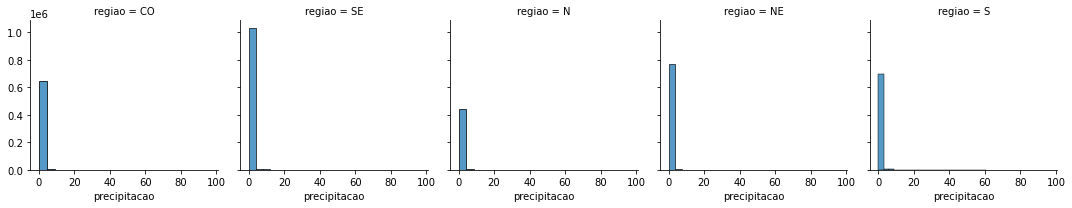

In [26]:
g = sns.FacetGrid(df, col='regiao')
g.map(sns.histplot, 'precipitacao')

#iteracao para cada regiao do pais
#for i in range(1, total+1):
#    ax = fig.add_subplot(total, 2, i)
#    sns.displot(df, x='precipitacao')
#    ax.plot(X, Y+temp_nacional, linestyle='-.', linewidth=2.5, color='red', label='Temperatura Média Anual do País')
#    ax.set_title('Temperatura Média em 2020 no ' + uf_temp[i-1][0])
#    ax.set_ylabel('Temperatura (Celsius)')

### Questão 1 - Quais as 5 estações meteorológicas que apresentaram maior precipitação acumulada do ano de 2020?

In [ ]:
#agrupamento dos dados por estacao, selecao da coluna precipitacao, soma dos valores e posterior ordenacao descendente
temp_estacoes = df.precipitacao.groupby(df.estacao).sum().sort_values(ascending=False)

#exibicao dos 5 primeiros valores
temp_estacoes.head(5)

In [ ]:
prep_nacional = df[df.precipitacao>0].precipitacao.mean()
prep_nacional

In [ ]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(1, 2, 1)
ax.bar(temp_estacoes.head(5).index, temp_estacoes.head(5).array)
ax.plot(X, Y+prep_nacional, linestyle='-.', linewidth=2.5, color='red', label='Temperatura Média Anual do País')
plt.xticks(rotation=45)
ax.set_title('Estações com Maior Acumulado de Precipitacao em 2020')
ax.set_ylabel('Mn')

### Questão 2 - E quais as 5 estações com menor precipitação acumulada de 2020?

In [ ]:
#exibicao dos 5 últimos valores
temp_estacoes.tail(5)

<b>OBS</b> <p>A estação de Barra Bonita/SP listada como a menor volume de precipitação chama a atenção. Há indícios de falha da medição.</p>

### Questão 3 - Plote um gráfico, um para cada estado, com a temperatura média mensal dos últimos 12 meses.

In [ ]:
temp_nacional = df.temp_orvalho.mean()
temp_regiao = df.groupby(df.regiao).temp_orvalho.mean()
temp_regiao

#queria ter inserido no gráfico abaixo a media da regiao mas nao deu tempo :-(

In [ ]:
uf_temp = []

#iteracao estado por estado
for uf in sorted(df.uf.unique()):
    temp_mensal = []

    #calculo da media da temperatura no termometro comum mes a mes do estado em questao
    for i in range(1, 13): temp_mensal.append(df[df.data.dt.month==i][df.uf==uf].temp_bulbo.mean())
    #for i in range(1, 13): temp_mensal.append(df[df.data.dt.month==i][df.uf==uf].temp_orvalho.mean())

    #armazenamento do estado e do vetor com as medias do ano
    uf_temp.append([uf, temp_mensal])

In [ ]:
fig = plt.figure(figsize=(22, 80))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
X, Y = np.linspace(-1, 12, 2), np.zeros(2)

for i in range(1, len(uf_temp)+1):
    ax = fig.add_subplot(len(uf_temp), 2, i)
    ax.bar(month_labels, uf_temp[i-1][1])
    ax.plot(X, Y+temp_nacional, linestyle='-.', linewidth=2.5, color='red', label='Temperatura Média Anual do País')
    ax.set_title('Temperatura Média em 2020 no ' + uf_temp[i-1][0])
    ax.set_ylabel('Temperatura (Celsius)')

### Questão 4 (Bônus): Análise exploratória livre do dataset. Fique à vontade para trazer aqui alguma análise que considere relevante - com base no dataset apresentado

### Qual o volume de precipitação na cidade de São Paulo mês a mês em 2020?

In [ ]:
temp_mensal = []
for i in range(1, 13): temp_mensal.append(df[df.data.dt.month==i][df.codigo=='A701'].temp_bulbo.mean())

fig = plt.figure(figsize=(22, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax = fig.add_subplot(1, 2, 1)
ax.bar(month_labels, temp_mensal)
ax.set_title('Precipitacao na Cidade de Sao Paulo em 2020')
ax.set_ylabel('Mn')

#queria ter cruzado mais dados aqui mas o tempo nao permitiu

### Acumulado de Precipitacao por Estado

In [ ]:
uf_chuvas = []
for uf in sorted(df.uf.unique()):
    chuvas_mensal = []
    for i in range(1, 13): chuvas_mensal.append(df[df.data.dt.month==i][df.uf==uf].precipitacao.sum())
    uf_chuvas.append([uf, chuvas_mensal])

In [ ]:

fig = plt.figure(figsize=(22, 80))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i in range(1, len(uf_chuvas)+1):
    ax = fig.add_subplot(len(uf_chuvas), 2, i)
    ax.bar(month_labels, uf_chuvas[i-1][1])
    ax.set_title('Precipitação ao longo de 2020 - ' + uf_chuvas[i-1][0])
    ax.set_ylabel('Mm')

In [ ]:
fig = plt.figure(figsize=(22, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df.data, df.precipitacao)

In [ ]:
sns.scatterplot(data=df, x="temp_orvalho", y="precipitacao", hue='regiao')

In [ ]:
sns.scatterplot(data=df, x="data", y="temp_bulbo", hue='regiao')

In [ ]:
df.describe()

In [ ]:
df.precipitacao.mean()

In [27]:
sns.scatterplot(data=df, x='data', y='precipitacao')

SyntaxError: invalid syntax (<ipython-input-27-c5a5867cad35>, line 1)